# Working with Classification Trees in Python

## Learning Objectives
Decision Trees are one of the most popular approaches to supervised machine learning. Decison Trees use an inverted tree-like structure to model the relationship between independent variables and a dependent variable. A tree with a categorical dependent variable is known as a **Classification Tree**. By the end of this tutorial, you will have learned:

+ How to import, explore and prepare data
+ How to build a Classification Tree model
+ How to visualize the structure of a Classification Tree
+ How to Prune a Classification Tree 

## 1: Import the Data

In the exerecise we will use a sample income data set to build a regression tree that predicts the salary of a worker based on their age and education level. 

In [5]:
import pandas as pd
income = pd.read_csv('income.csv')
income.head()

,Age,Education,Salary
0,25,Bachelors,43.9
1,30,Bachelors,54.4
2,45,Bachelors,62.5
3,55,Bachelors,72.5
4,65,Bachelors,74.6


## 2:Explore the Data

In [6]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        30 non-null     int64  
 1   Education  30 non-null     object 
 2   Salary     30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


Summary statistics

In [7]:
income.describe()

,Age,Salary
count,30.000000,30.000000
mean,43.366667,64.406667
std,14.375466,26.202684
min,24.000000,16.800000
25%,30.500000,46.350000
50%,45.000000,62.100000
75%,55.000000,76.800000
max,65.000000,118.000000


Data Visualization

To ensure that our plots show up in line, we run the map plot lib in line command. Then we import pie plot from the map plot lib package  as well as a seaborne package. 

In [8]:
%matplotlib inline 
from matplotlib import pyplot as plt
import seaborn as sns


Boxplot Education vs Salar.
The boxplot shows the distribbution of salary by edication level. 

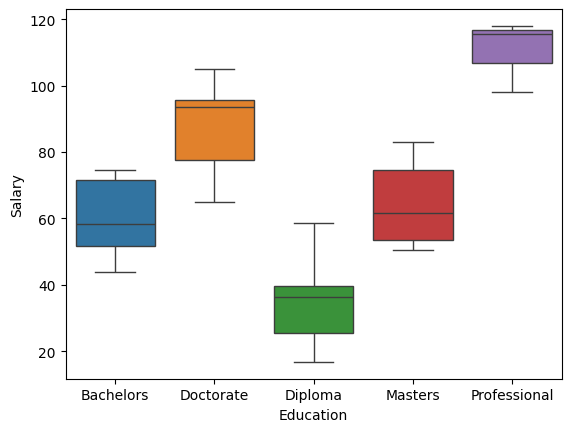

In [9]:
ax = sns.boxplot(data=income, x='Education', y='Salary', hue='Education')

Boxplot Education vs Age.
The boxplot shows the distribbution of Age by edication level. 

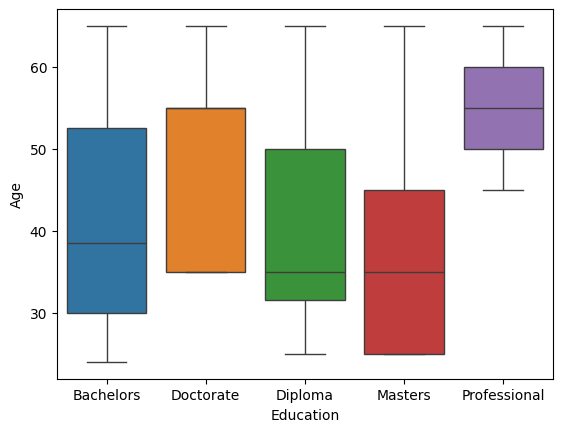

In [10]:
ax = sns.boxplot (data= income, x='Education', 
                  y='Age', 
                  hue= 'Education')

Scatterplot Education vs Age.
To look at the relationship between salary and age.

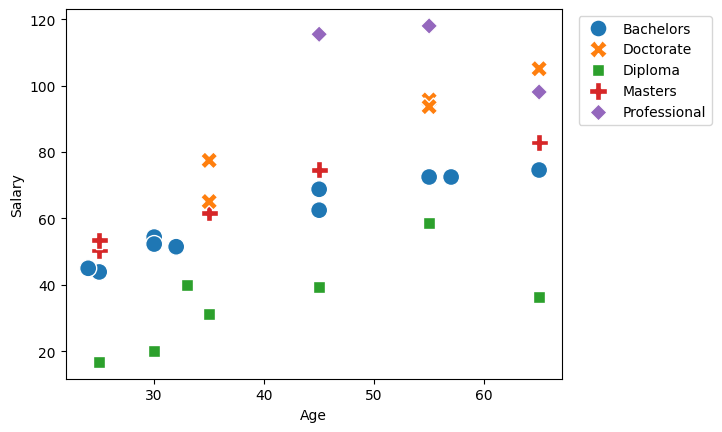

In [11]:
ax = sns.scatterplot (data = income, 
                      x= 'Age',
                      y= 'Salary',
                      hue = 'Education',
                      style = 'Education',
                      s = 150)
ax = plt.legend (bbox_to_anchor = (1.02,1), loc= 'upper left')

The chart shows somewhat of a linear relationship between these two variables. This means that generally, the older a worker is, the higher their salary 

## 3. Prepare the Data

We prepare our data for modeling by splitting it into training and test sets. 
Prior to doing so, we must first separate the dependent variable from the independent variables. 

Let's start by creating a data fram calles Y for the dependent variable, which is salary. 


In [12]:
y = income[['Salary']] # dependent variable

Then we create a second data frame X, for the independent variables, age and education.

In [13]:
X = income[['Age', 'Education']]

Next, we import the train test split function from the SK learn model selections package. 
Then we split the X and Y data frames into X_train X_test y_train and y_test. 

Note that we set train size to 0.6. This means we want 60% of the original data to become the training data. While 40% becomes the test data. 

We also set stratify  to education column in X, which means we want the data split using stratified random sampling based on the values of the education column. 

Finally, we set random state to 1234. Simple so we get the same results every time we do the split. 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y,
                                                     train_size= 0.6,          # 60% data becomes the training data
                                                     stratify= X['Education'], # stratfied random sampling
                                                     random_state= 1234)

The shape attribute of the X_train and X_test data frames tell us how any instances or records are in each data set. 

In [15]:
X_train.shape, X_test.shape

((18, 2), (12, 2))

We can see that we have 18 instances in the training set an 12 instances in the test set. 

The psyche learn package we intend to use to fill out regression trees does not support non-numeric values, like the education column in our data. As a result, we have to dummy code the education columns in the X_train and X_test data frames. 

Before we dummy code X_train let's preview it using the head method. 

In [16]:
X_train.head()

,Age,Education
0,25,Bachelors
16,45,Masters
17,65,Masters
29,65,Professional
8,25,Diploma


To dummy code X_train, we pass it to the Pandas get dummy fucntion and preview the updated data frame. 

In [28]:
X_train = pd.get_dummies(X_train, dtype=int)
X_train.head()

,Age,Education_Bachelors,Education_Diploma,Education_Doctorate,Education_Masters,Education_Professional
0,25,True,False,False,False,False
16,45,False,False,False,True,False
17,65,False,False,False,True,False
29,65,False,False,False,False,True
8,25,False,True,False,False,False


Notice that each of the categrical values in the education column are columns, each with a dichotomous value of zero and one. 

Let's dummy code and preview the test data set X_test as well. 

In [27]:
X_test = pd.get_dummies(X_test, dtype=int)
X_test.head()

,Age,Education_Bachelors,Education_Diploma,Education_Doctorate,Education_Masters,Education_Professional
9,30,0,1,0,0,0
21,25,0,0,0,1,0
4,65,1,0,0,0,0
10,35,0,1,0,0,0
7,65,0,0,1,0,0


We are done with data preparation. We can now build our model. 

To build the regression tree in Python, we need to import the decision tree regressor class from the SK learn tree sub package. we then instantiate an object from the class. We call the object, regressor. 

In [29]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor (random_state= 1234)

In [30]:
model = regressor.fit(X_train, y_train)

To evaluate and estimate the future performance of a model, let's see how well it fits against the test data.
To do so, we pass the test data to the score method of the model. This returns the R squared of the model on the test data.  

In [31]:
model.score(X_test, y_test)

0.5853149222529794

R squared value we get here tells us that our model is only able to explain 58.5% of the variablity and the response values of the test data. We can do it better.

Another way to evaluate a regression tree is to evaluate how accurate it is. This means comparing the predicted values against actual values or gettiing the mean absolute error of the predictions. 

Before we can get the mean absolute error, we need to get the models predicted response values for the test data. 
We assign these results to a variable called y_test_pred. 

In [32]:
y_test_pred = model.predict(X_test)

Next, we import the mean absolute error function from SK learn metrics of package and calculate the mean absolute error between the actual response values y_test and the predicted response values y_test_pred.

In [33]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_test_pred)

np.float64(13.541666666666666)

the mean absolute error implies that going forward, we should expect the salary values our regression tree predicts, to be off the mark by an average of plus or minus 13.542. 

## 5. Visulize the Regression Tree

Let's visulize the regression tree to get a better understanding of the tree logic.

First, we make sure that we import the tree object from the sklearn package. 

The figure method of pzplot allows us to specify the size of our tree, feel free to adjust this to see how it impacts the size of your tree. 

Next, we will use the plot tree method of the tree object to visualize the tree. The first argument we pass to this method is the regression tree model itself. then we specify the dummy coded independent variables as a list. Finally, we specify that we want the nodes of the tree color field. 

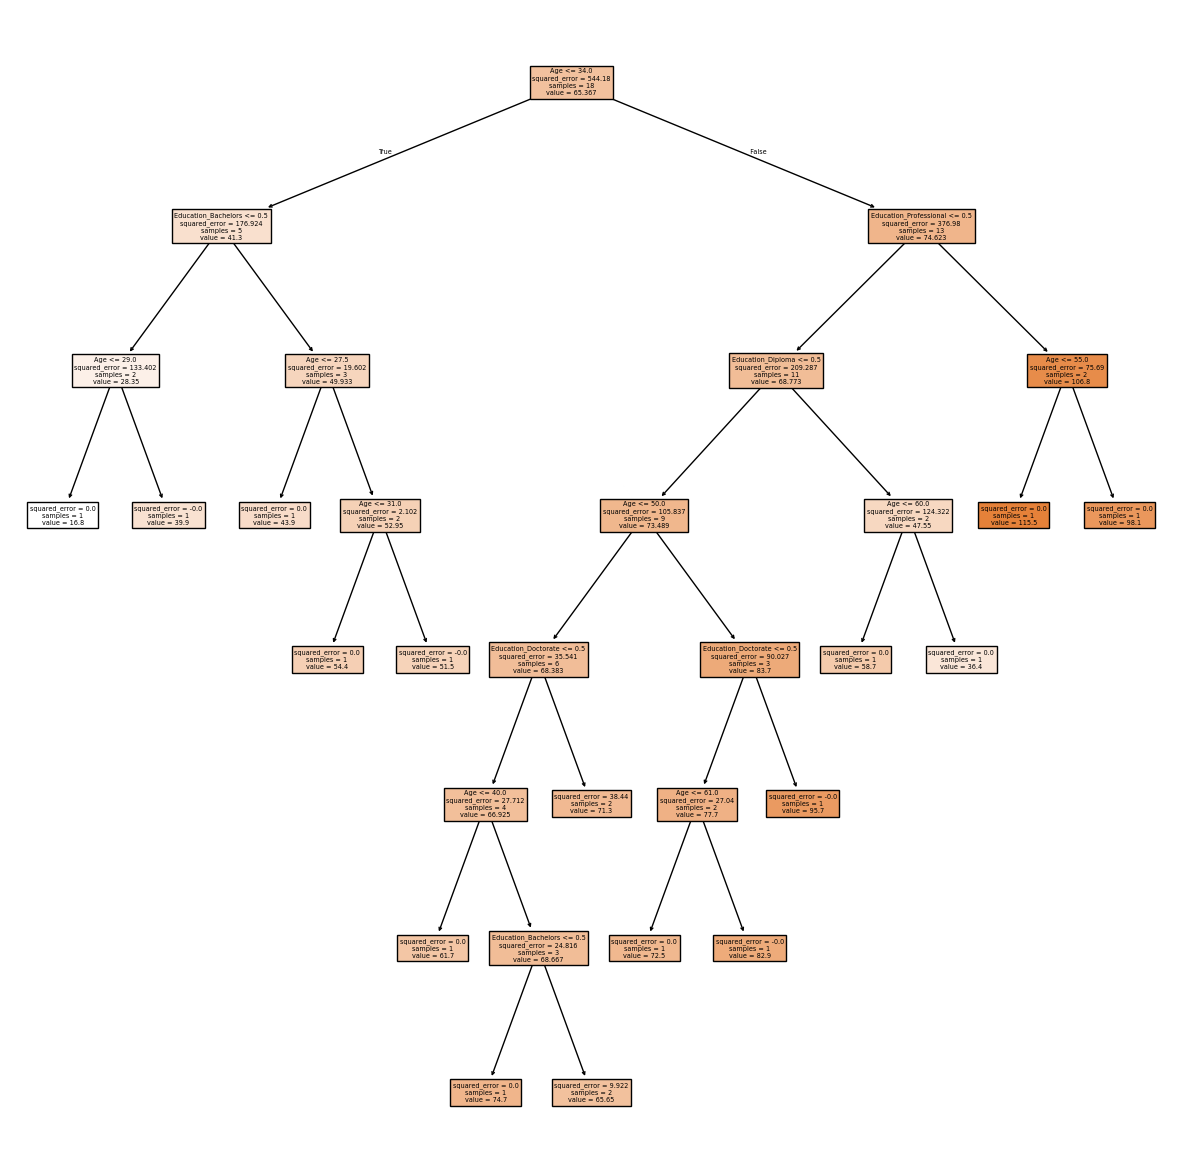

In [34]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(model,
               feature_names= list(X_train.columns), 
               filled= True);

Because of the depth, and number of nodes in our tree, it is a difficult to make out the details of the tree. 

For illustrative purposes alone, let's limit the tree visulaization to the first three nodes in the tree. To do this, we set the max depth argument in the plot tree method to one.  

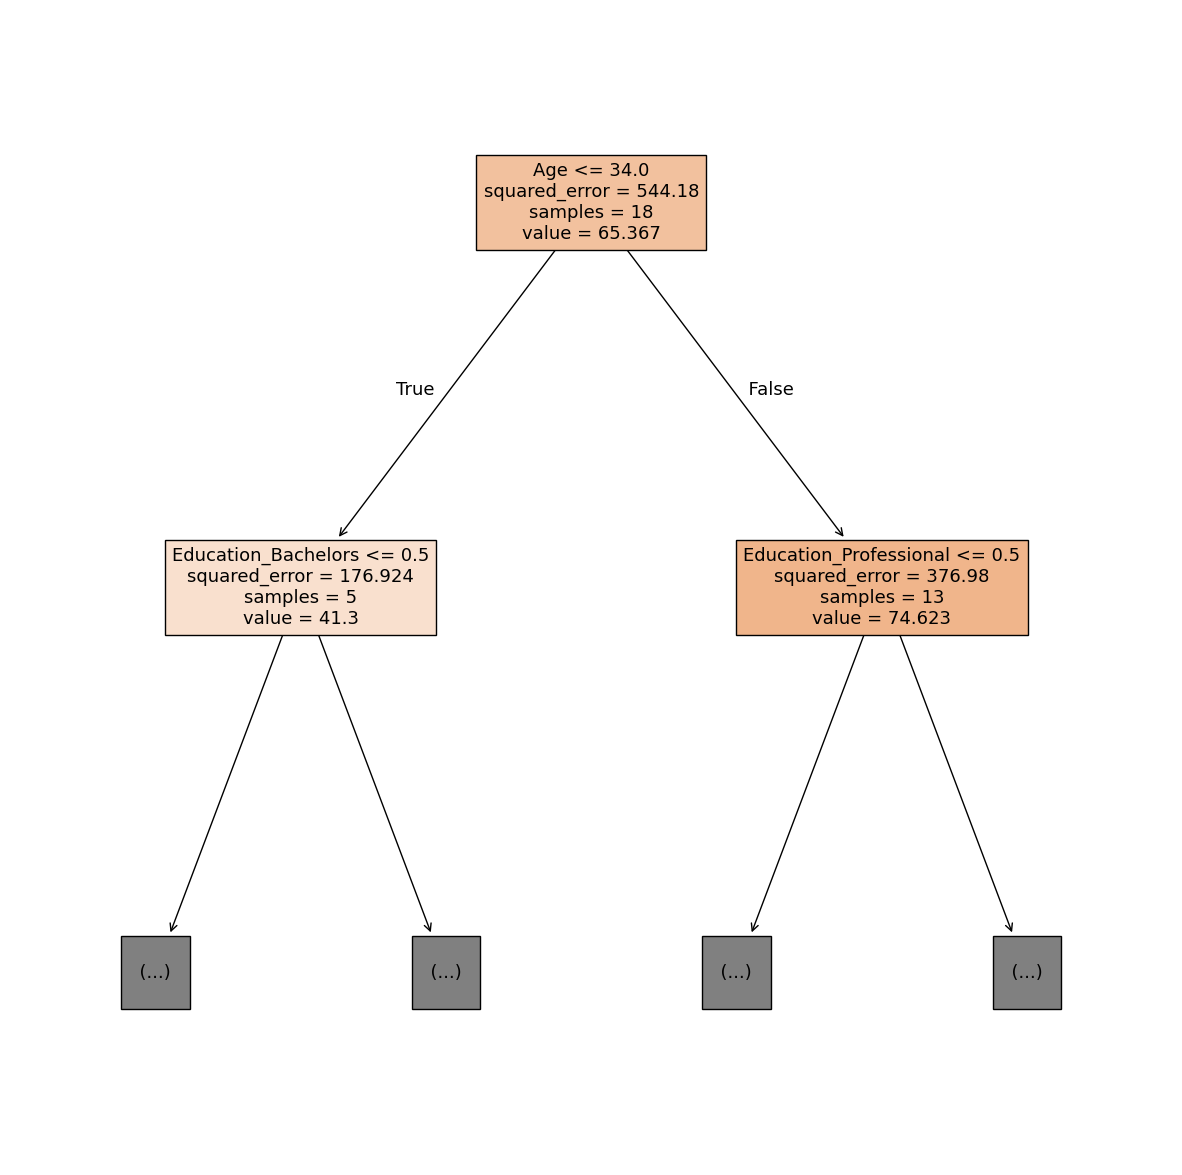

In [35]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(model,
               feature_names= list(X_train.columns), 
               filled= True,
               max_depth= 1);

Now we have a clearer view of the top set of nodes. Let's make a moment to understand the structure of the tree based on what we have here. 

We can interpret the root node as asking the question, is a worker 34 years old or younger? if so, branch to the left, else branch to th right. The fact that the age variable was used as a first split, let us know that it is the most important variable within the data set in predicting the salary of a worker. Know that the branch logic and the next two nodes are a bit peculiar. For example, the right branch evaluates wether education professional is less than or equal to 0.5. To understand what is happening here, recall that we had to dummy code original education values to either zero or one. If a worker has a professional degree, the value will be one and zero if they don't. 

With that in mind, we can interpret this branch logic asking the question, does a worker not have a professional degree? If yes, branch to the left, else branch to the right. or we can ask the opposite question and reverse the direction of the responses. In other words, we can ask, does a worker have a professional degree, if so, branch through right, else branch to the left. 

 Within each node, besides the branch logic, we laso get a value for the MSE or mean squared error. This can be interpreted as a measure of the degree of impurity, or variability in a partition. The smaller this value is, the closer the values are to the mean. Conversely, the larger this value is the further the values are to the mean. 

 We also see the number of items or samples within each partition. NOtice that this value decreases as we work our way down the tree towards the leaf nodes. Thi is expected since the primary objective of recursive partitioning is to create smaller, more homogenous subsets of the data. 

 The last information in each node value is the mean of the values in a particular partition. This is the predicted value of the regression tree. For example, if the regression tree were just one node, the root node, the tree would predict that all worker salaries was $65,367. The average of all this error is in the training data.

 One of the benefits of decision trees is that they are pretty good at ranking the effectiveness of independent variables in predicting the values of the dependent variable. This is known as feature importance. We can get the feature importance of each independent variable from the feature importances on the score attributes of our model. 

In [36]:
importance = model.feature_importances_
importance

array([0.54597998, 0.06326845, 0.11352129, 0.02490287, 0.        ,
       0.25232742])

We get back an array of importanct scores for each independent variable. 

To put these scores in context, let's connect them to the feature names and visualize the scores. 
To do this, the first thing we create Pandas series  called feature importance by using the importance array as the values and independent variable names as index. 
Then we sort the series by value and plot it. 

Text(0, 0.5, 'Importance')

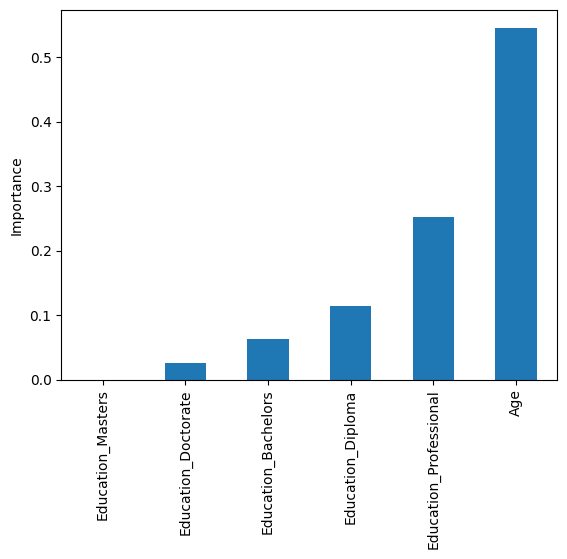

In [37]:
feature_importance = pd.Series(importance, index=X_train.columns)
feature_importance.sort_values().plot(kind= 'bar')
plt.ylabel('Importance')

From the plot, we see that the age variable is the most important in predicting salary. While the education masters feature is the least important.

## 6. Prune the Regression Tree

Now that we have trained and visualized a regression tree, let's look into what we can do to improve its performance by pruning. Decision trees are prone to overfitting. One telltale sign that a tree has overfiit is if it performs well in the training data but very poorly on the test data. 

Let's evaluate our tree to see if it overfit on the training data. To do this, we pass the training data to the score method of the model. 

In [38]:
model.score(X_train, y_train)

0.9901253057607573

Our model is able to explain 99% of the variability in the training data. 

Let's see how it does on the test data. 

In [39]:
model.score(X_test, y_test)

0.5853149222529794

Similarly, we pass the test data to the score method of the model. Our model is only able to explain 59% of the variablity of the test data. It has overfit the training data and need to be pruned. 

There are two ways to prune a decision tree. 
+ One is to set parameters that manage its growth during the recursive partitioning process. This is known as pre-pruning. 
+ Another approach is to allow the tree to fully grow unimpeded and then gradually reduce its size in order to improve its performance. this is known as post-pruning. 

In this tutorial, we will use the post-pruning approach. The specific strategy we will use is known as cost complexity pruning. The primary objective in cost complexity pruning is finding the right parameter, known as alpha. The right alpha is one that performs the best with the test data. To get a list of effective alpha values to choose from,  we start by passing the training data to the cost complexity pruning path method of our previously instantiated regressor object. Then we extract a list of the effective alphas. 

In [40]:
path = regressor.cost_complexity_pruning_path(X_train, y_train)
ccp_alpha = path.ccp_alphas
list(ccp_alpha)

[np.float64(0.0),
 np.float64(0.23361111111110705),
 np.float64(2.1578395061724223),
 np.float64(3.004444444444693),
 np.float64(3.0334259259259144),
 np.float64(8.409999999999753),
 np.float64(12.000000000000506),
 np.float64(13.813611111110644),
 np.float64(14.822500000000016),
 np.float64(26.06669753086468),
 np.float64(31.05601851851865),
 np.float64(61.1659960718292),
 np.float64(135.95562548562512),
 np.float64(222.77094017094078)]

The list of effective alphas go from yero to all the way to 222.77. The larger the value for alpha, the smaller the tree will be. the maximum value of alpha represents a tree with just one node. We do not want that one. We remove it from our list of effective alphas. 

In [41]:
ccp_alpha = ccp_alpha[:-1]
list(ccp_alpha)

[np.float64(0.0),
 np.float64(0.23361111111110705),
 np.float64(2.1578395061724223),
 np.float64(3.004444444444693),
 np.float64(3.0334259259259144),
 np.float64(8.409999999999753),
 np.float64(12.000000000000506),
 np.float64(13.813611111110644),
 np.float64(14.822500000000016),
 np.float64(26.06669753086468),
 np.float64(31.05601851851865),
 np.float64(61.1659960718292),
 np.float64(135.95562548562512)]

Next we train several tree using the different values for alpha. 

We start by creating two empty lists: train score and test scores to store the results of our model evaluation. Then we loop through all the alpha values in our list of effective alphas. For each alpha, we instatiate a regressor with the alpha, fit a regresion tree to the training data, evaluate the tree's performance on the training and test datsets and append the results to the train scores and test scores. 

In [42]:
train_scores, test_scores = [], []
for alpha in ccp_alpha:
    regressor_ = DecisionTreeRegressor(random_state= 1234, ccp_alpha= alpha)
    model_ = regressor_.fit(X_train, y_train)
    train_scores.append(model_.score(X_train, y_train))
    test_scores.append(model_.score(X_test, y_test))

Now, we can plot training and test scores against different values of alpha. 

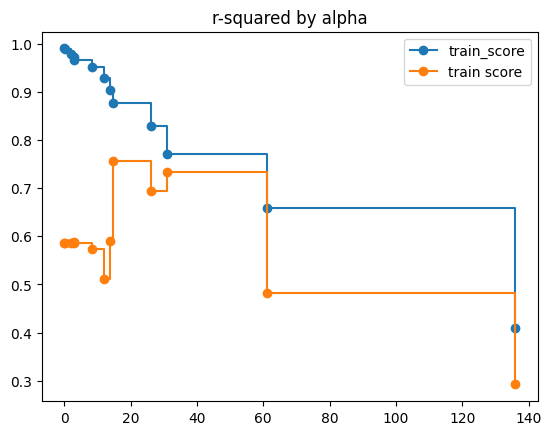

In [43]:
plt.plot(ccp_alpha, 
         train_scores,
         marker = 'o',
         label = 'train_score',
         drawstyle = 'steps-post')
plt.plot(ccp_alpha, 
         test_scores, 
         marker = 'o',
         label = 'train score',
         drawstyle = 'steps-post')
plt.legend()
plt.title('r-squared by alpha') ;


The plot shows that when alpha is zero, the tree overfits. The training score is at its highest. As alpha ncreases more of the tree is pruned, which results in reduced training scores. 

The test scores behave a little differently. As alpha increase, the test score initially increases. Then it starts to decline as well. The best alpha is that corresponds with the highest test score. By a visual inspection alone, this seems o fall somewhere 10 and 20. 

Let's get a list of these test scores.

In [44]:
test_scores

[0.5853149222529794,
 0.5857107382012932,
 0.5857107382012932,
 0.5889110156116097,
 0.5861012049128272,
 0.5742699063850475,
 0.5110187660049715,
 0.5901546580161237,
 0.7572572323335666,
 0.6933555316243081,
 0.7328980549684876,
 0.4823659659054369,
 0.2920328593359385]

The test scores are listed in the dame order as the effective alphas in the ccp_alpha's list. To get the value for the best alpha, we first get the index of the highest test score and I use the index to select the corresponding alpha from the ccp_alpha's list. 

In [45]:
ix = test_scores.index(max(test_scores))
best_alpha = ccp_alpha[ix]
best_alpha

np.float64(14.822500000000016)

We see that the best alpha for the regression tree is 14.8. Finally, we fit a regression tree on the training data pruned using the best alpha. 

Let's get the model's R squared on the training data. 

In [48]:
regressor_ = DecisionTreeRegressor(random_state=1234, ccp_alpha= best_alpha)
model_ = regressor_.fit(X_train, y_train)

In [49]:
model_.score(X_train, y_train)

0.4093699514332394

We see that R squared on the trining data has gone down from.99 to .877. 

Let's get the model's R squared on the test data as well. 

In [50]:
model_.score(X_test, y_test)

0.2920328593359385

We see that R squared on the test data has gone up from.585 to .757. 

we can visualize our pruned regression tree. 


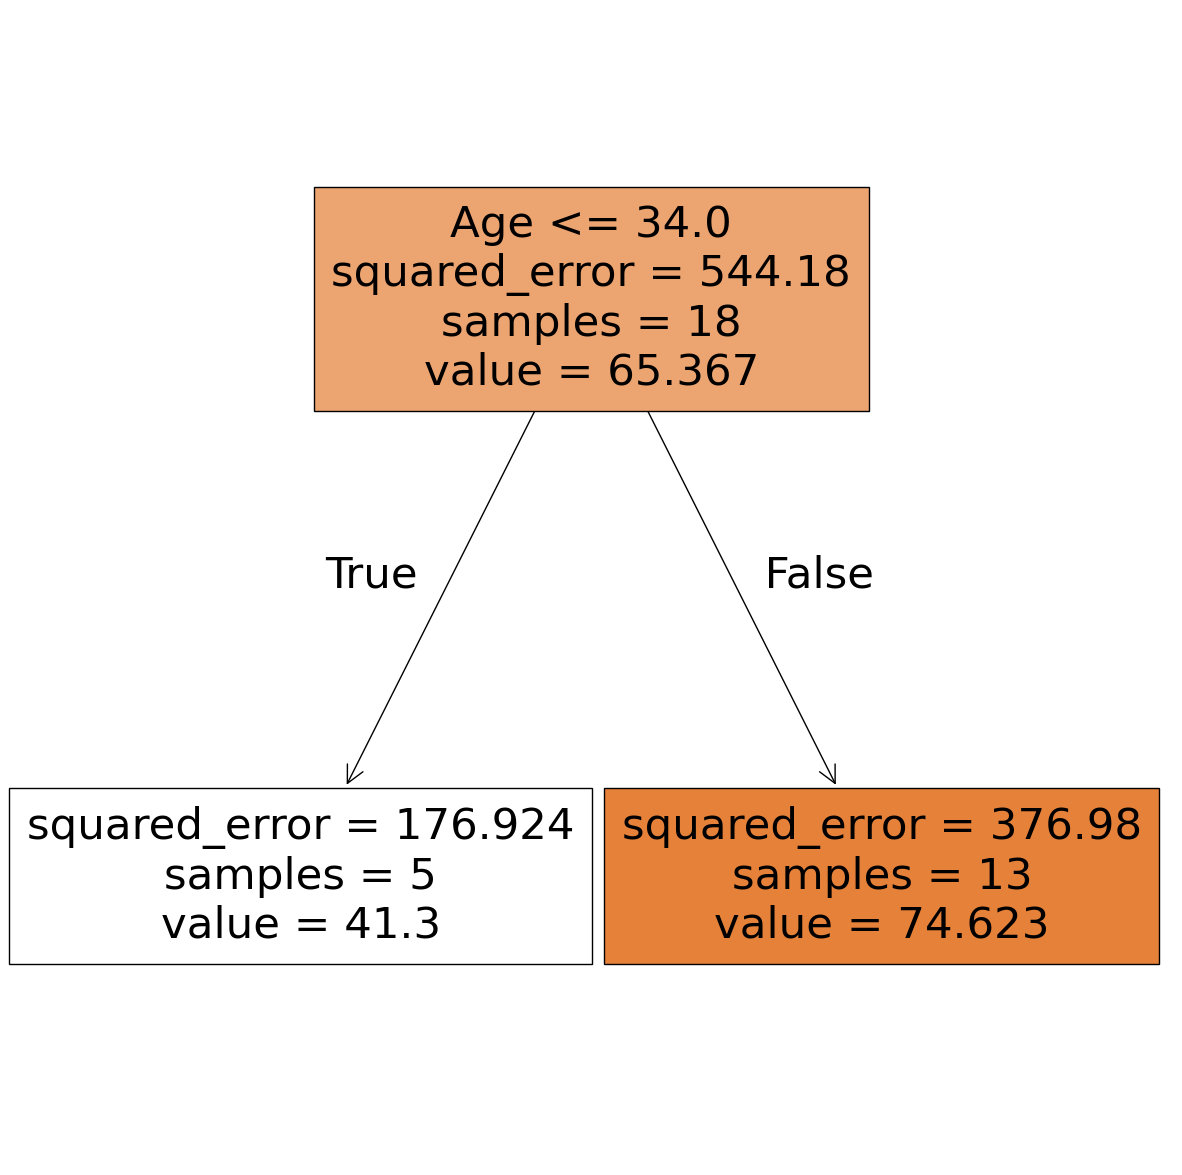

In [51]:
plt.figure(figsize= (15, 15))
tree.plot_tree(model_, 
               feature_names= list(X_train.columns),
               filled= True
               ) ;